## 10 - Spectral Analysis I: Fourier Transform

### 10.1 Introduction to Spectral Analysis
- Spectral analysis involves decomposing a time series into its constituent frequencies.

- It provides insight into periodic patterns and cycles within the data that might not be obvious in the time domain.

### 10.2  Fourier Transform

- The Fourier Transform converts a time series from the time domain to the frequency domain. 

- Discrete Fourier Transform (DFT): used for digital time series data.

-  Fast Fourier Transform (FFT): an efficient algorithm to compute the DFT.

- Mathematical representation: 

Fourier Transform:

$$ X(f) = \sum_{t=0}^{N-1} x(t) e^{-i2\pi ft}.$$

Inverse Fourier Transform:

$$x(t) = \frac{1}{N} \sum_{f=0}^{N-1} X(f) e^{i2\pi ft}.$$

### 10.3 Power Spectral Density (PSD) and Periodogram

- PSD represents the power of different frequency components in the time series. It helps to identify dominant frequencies.

- The periodogram is a common method for estimating the PSD.

- Mathematical representation:

The periodogram $P(f)$ of a discrete time series $x(t)$ is given by 
$$P(f) = \frac{1}{N} \left| \sum_{t=0}^{N-1} x(t) e^{-i2\pi ft} \right|^2= \frac{1}{N} |X(f)|^2.$$

- Interpretation of the Periodogram:
1. The x-axis of the periodogram represents the frequency components.

2. The y-axis represents the power (or amplitude squared) associated with each frequency.

3. Peaks in the periodogram indicate dominant frequencies in the time series.

4. These dominant frequencies correspond to periodic components in the original time series.

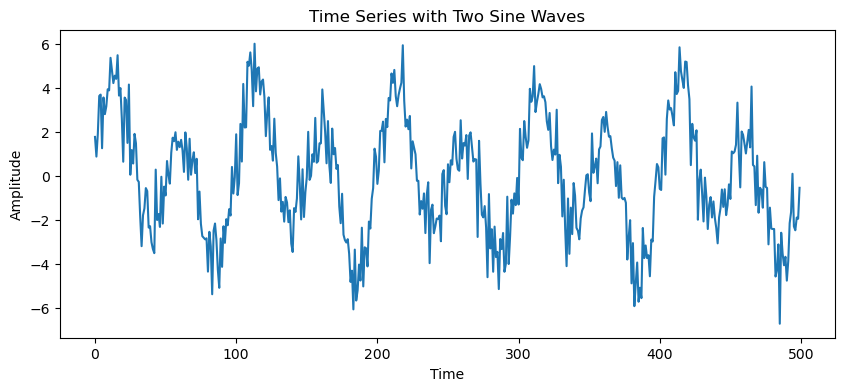

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a time series with two sine waves
np.random.seed(0)
n = 500
t = np.arange(n)
signal = 3 * np.sin(2 * np.pi * t / 50) + 1.5 * np.sin(2 * np.pi * t / 100) + np.random.normal(0, 1, n)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Time Series with Two Sine Waves')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

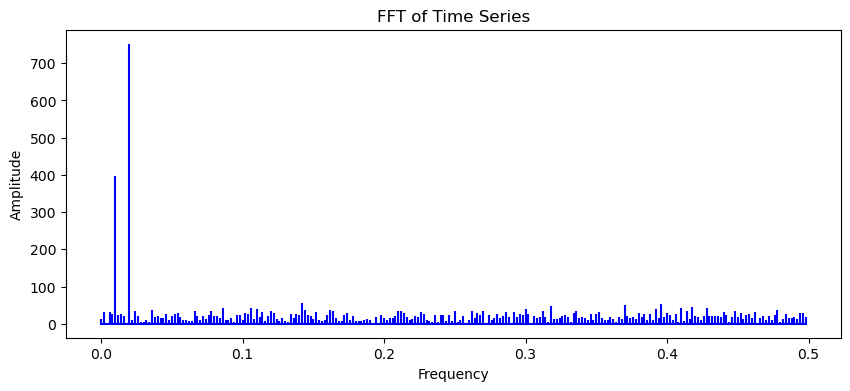

Dominant Frequencies:  [ 0.142 -0.01   0.01  -0.02   0.02 ]
Dominant Amplitudes:  [ 54.62572879 397.09892219 397.09892219 752.28374535 752.28374535]


In [4]:
# Apply FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n)

# Plot the FFT result
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:n // 2], np.abs(fft_result)[:n // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT of Time Series')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Extract the highest frequencies
indices = np.argsort(np.abs(fft_result))[-5:]  # Top 5 frequencies
dominant_frequencies = frequencies[indices]
dominant_amplitudes = np.abs(fft_result)[indices]

print("Dominant Frequencies: ", dominant_frequencies)
print("Dominant Amplitudes: ", dominant_amplitudes)

In [23]:
1/0.02

50.0

/var/folders/4j/p29_40d112l19pb5yt8t3w_c0000gn/T/ipykernel_46129/907948603.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.stem(1/frequencies[:n // 2], np.abs(fft_result)[:n // 2], 'b', markerfmt=" ", basefmt="-b")


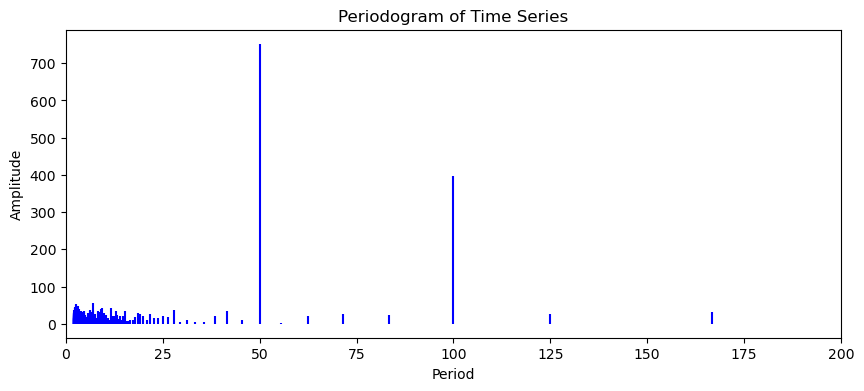

In [5]:
# Plot periodogram
plt.figure(figsize=(10, 4))
plt.stem(1/frequencies[:n // 2], np.abs(fft_result)[:n // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('Periodogram of Time Series')
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0, 200)  # Adjust the x-axis limit for better visualization
plt.show()

### 10.4 Real-world Applications

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


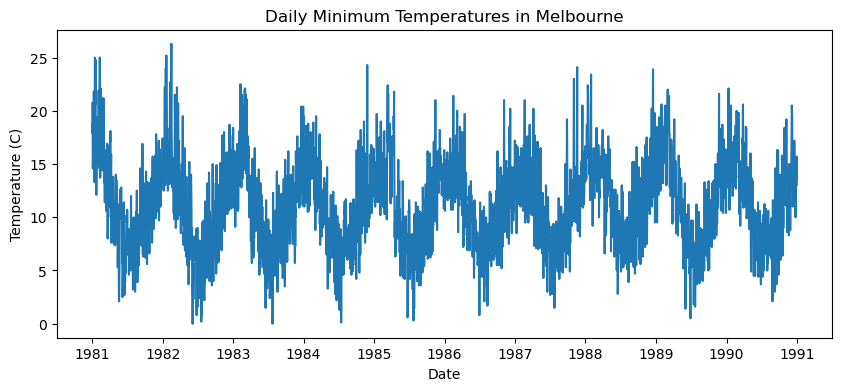

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Download the dataset from a public URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
print(data.head())

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Temp'])
plt.title('Daily Minimum Temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

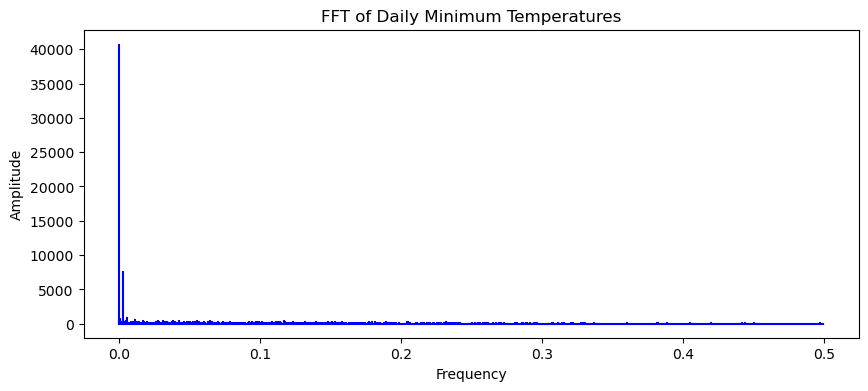

Dominant Frequencies:  [ 0.00547945 -0.00547945  0.00273973 -0.00273973  0.        ]
Dominant Amplitudes:  [ 1038.54262303  1038.54262303  7686.887092    7686.887092
 40798.8       ]


In [7]:
# Extract the temperature values
temps = data['Temp'].values

# Apply FFT
fft_result = np.fft.fft(temps)
frequencies = np.fft.fftfreq(len(temps))

# Plot the FFT result
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:len(temps) // 2], np.abs(fft_result)[:len(temps) // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT of Daily Minimum Temperatures')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Extract the highest frequencies
indices = np.argsort(np.abs(fft_result))[-5:]  # Top 5 frequencies
dominant_frequencies = frequencies[indices]
dominant_amplitudes = np.abs(fft_result)[indices]

print("Dominant Frequencies: ", dominant_frequencies)
print("Dominant Amplitudes: ", dominant_amplitudes)


In [10]:
1/0.00273973

364.9994707507674

/var/folders/4j/p29_40d112l19pb5yt8t3w_c0000gn/T/ipykernel_46129/126876504.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.stem(1/frequencies[:len(temps) // 2], np.abs(fft_result)[:len(temps) // 2], 'b', markerfmt=" ", basefmt="-b")


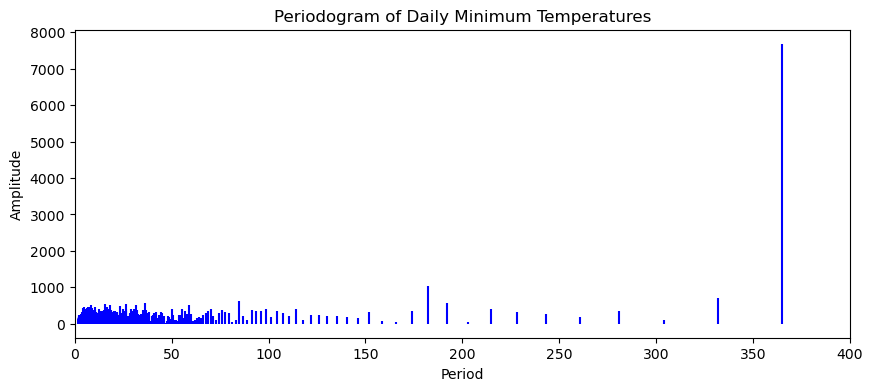

In [8]:
# Plot periodogram
plt.figure(figsize=(10, 4))
plt.stem(1/frequencies[:len(temps) // 2], np.abs(fft_result)[:len(temps) // 2], 'b', markerfmt=" ", basefmt="-b")
plt.title('Periodogram of Daily Minimum Temperatures')
plt.xlabel('Period')
plt.ylabel('Amplitude')
plt.xlim(0, 400)  # Adjust the x-axis limit for better visualization
plt.show()

## 11 - Spectral Analysis II: Sinusoidal Models

### 11.1 Introduction to Sinusoidal Models

- Sinusoidal models are used to represent periodic components in time series data.

- These models are especially useful when the time series exhibits regular, repeating patterns over time.


### 11.2 Constructing Sinusoidal Models

- Mathematical representation:

$$ y(t) = A_1 \sin(w_1 t + \phi_1) + A_2 \sin(w_2 t + \phi_2) + \epsilon(t) $$

where:

$y(t)$ is the observed time series;

$A_1, A_2, \dots$ are the amplitudes of the sine waves;

$w_1, w_2, \dots$ are the angular frequencies;

$\phi_1, \phi_2,\dots$ are the phases;

$\epsilon(t)$ is the error term.


### 11.3 Modeling Method I: Sinusoidal Model Function

Significant frequencies: [0.01 0.02]


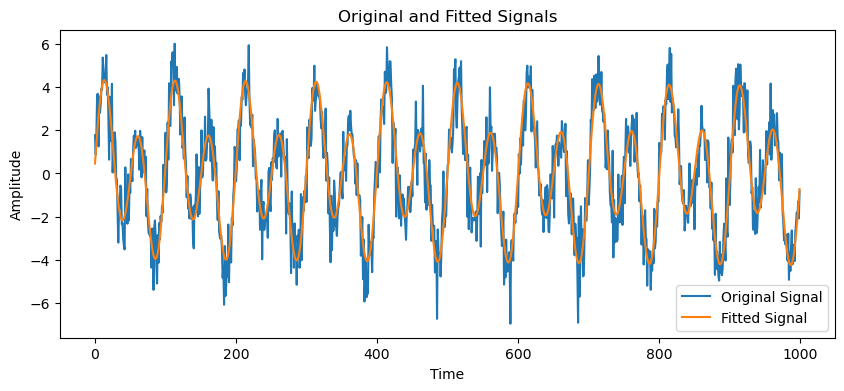

In [12]:
#import numpy as np
#import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate the same synthetic time series
np.random.seed(0)
n = 1000
t = np.arange(n)
signal = 3 * np.sin(2 * np.pi * t / 50) + 1.5 * np.sin(2 * np.pi * t / 100) + np.random.normal(0, 1, n)

# Perform Fourier Transform
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n)

# Take the positive frequencies
positive_frequencies = frequencies[:n // 2]
positive_fft_result = np.abs(fft_result[:n // 2])

# Identify significant frequencies
significant_freqs = positive_frequencies[np.argsort(positive_fft_result)[-2:]]  # Top 2 significant frequencies
print("Significant frequencies:", significant_freqs)

# Define the sinusoidal model function
def sinusoidal_model(t, A1, w1, phi1, A2, w2, phi2):
    return A1 * np.sin(w1 * t + phi1) + A2 * np.sin(w2 * t + phi2)

# Initial guess for the parameters [A1, w1, phi1, A2, w2, phi2]
initial_guess = [3, 2 * np.pi * significant_freqs[0], 0, 1.5, 2 * np.pi * significant_freqs[1], 0]

# Fit the sinusoidal model to the data
params, covariance = curve_fit(sinusoidal_model, t, signal, p0=initial_guess)

# Extract the fitted parameters
A1, w1, phi1, A2, w2, phi2 = params

# Create the fitted model
fitted_signal = sinusoidal_model(t, A1, w1, phi1, A2, w2, phi2)

# Plot the original and fitted signals
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, fitted_signal, label='Fitted Signal')
plt.title('Original and Fitted Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### 11.4 Modeling Method II: Ordinary Least Squares

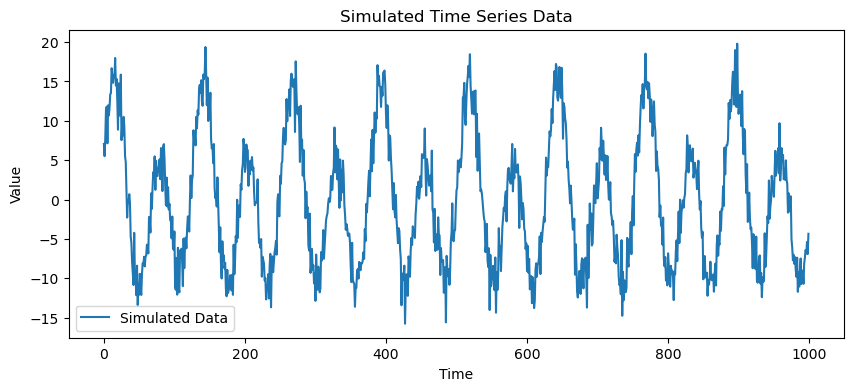

Significant frequencies: [0.008 0.016]


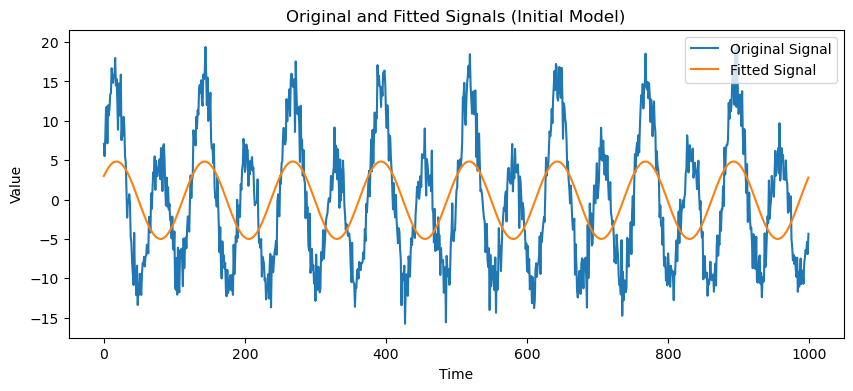

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     109.5
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           1.00e-43
Time:                        21:54:37   Log-Likelihood:                -3424.0
No. Observations:                1000   AIC:                             6854.
Df Residuals:                     997   BIC:                             6869.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0898      0.235     -0.382      0.7

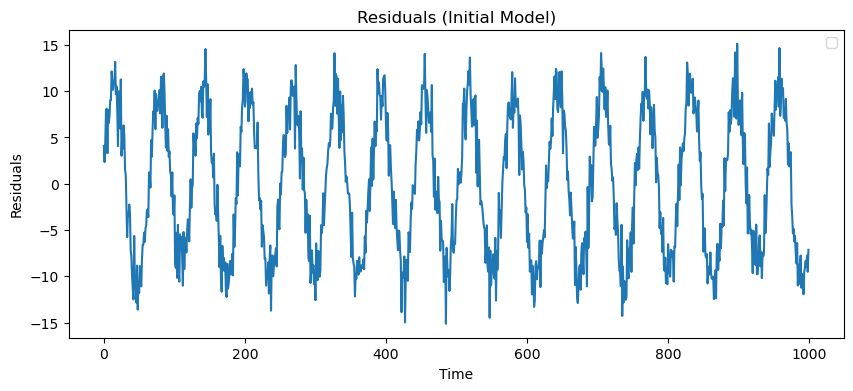

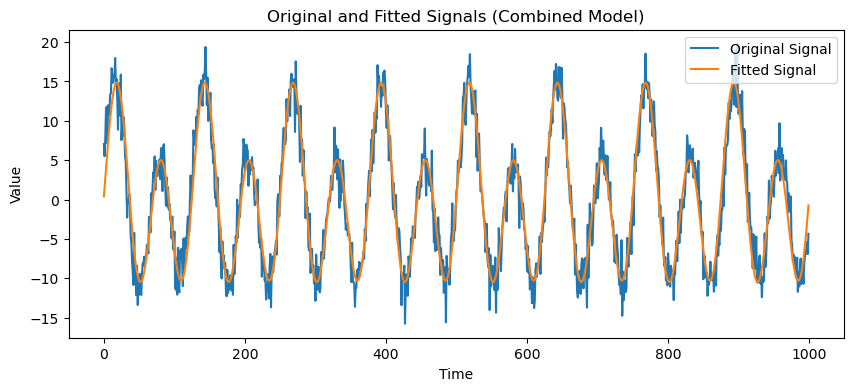

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


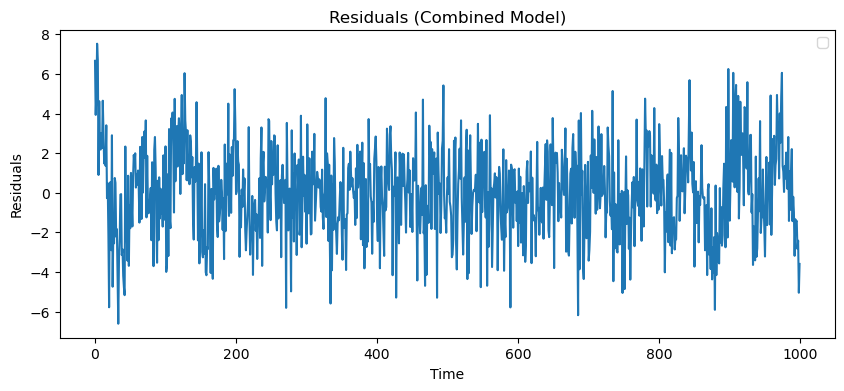

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     3079.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:54:37   Log-Likelihood:                -2226.5
No. Observations:                1000   AIC:                             4463.
Df Residuals:                     995   BIC:                             4487.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0898      0.071     -1.263      0.2

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit
import statsmodels.api as sm

# Generate simulated data
np.random.seed(0)
t = np.arange(0, 1000)
A1, A2 = 10, 5
w1, w2 = 0.1, 0.05
phi1, phi2 = 0, np.pi / 4
noise = np.random.normal(0, 2, len(t))
simulated_data = A1 * np.sin(w1 * t + phi1) + A2 * np.sin(w2 * t + phi2) + noise

# Plot the simulated data
plt.figure(figsize=(10, 4))
plt.plot(t, simulated_data, label='Simulated Data')
plt.title('Simulated Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Perform Fourier Transform
fft_result = fft(simulated_data)
frequencies = fftfreq(len(t))

# Take the positive frequencies
positive_frequencies = frequencies[:len(t) // 2]
positive_fft_result = np.abs(fft_result[:len(t) // 2])

# Identify the most significant frequencies
significant_indices = np.argsort(positive_fft_result)[-2:] #returns the indices of the two largest values
significant_freqs = positive_frequencies[significant_indices]

print("Significant frequencies:", significant_freqs)

# Create the design matrix with sine and cosine terms for significant frequencies
def create_design_matrix(t, freqs):
    # Create columns for cosine and sine terms for each frequency and combine them into a matrix
    X = np.column_stack([
        np.cos(2 * np.pi * f * t) for f in freqs
    ] + [
        np.sin(2 * np.pi * f * t) for f in freqs
    ])
    return sm.add_constant(X)  # Add a constant term for the intercept

# Fit the initial model with the first significant frequency
initial_freqs = significant_freqs[:1]
X_initial = create_design_matrix(t, initial_freqs)
model_initial = sm.OLS(simulated_data, X_initial).fit()

# Generate the fitted signal
fitted_signal_initial = model_initial.predict(X_initial)

# Plot the original and fitted signals
plt.figure(figsize=(10, 4))
plt.plot(t, simulated_data, label='Original Signal')
plt.plot(t, fitted_signal_initial, label='Fitted Signal')
plt.title('Original and Fitted Signals (Initial Model)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display the model summary
print(model_initial.summary())

# Check residuals of the initial model
residuals_initial = simulated_data - fitted_signal_initial
plt.figure(figsize=(10, 4))
plt.plot(t, residuals_initial)
plt.title('Residuals (Initial Model)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Perform Fourier Transform on residuals
fft_result_residuals = fft(residuals_initial)
positive_fft_result_residuals = np.abs(fft_result_residuals[:len(residuals_initial) // 2])

# Identify any additional significant frequencies in the residuals
additional_indices = np.argsort(positive_fft_result_residuals)[-1:]  # Choose one more frequency
additional_freqs = positive_frequencies[additional_indices]

# Combine the initial and additional significant frequencies
combined_freqs = np.concatenate((initial_freqs, additional_freqs))

# Create the design matrix with all significant frequencies
X_combined = create_design_matrix(t, combined_freqs)
model_combined = sm.OLS(simulated_data, X_combined).fit()

# Generate the fitted signal
fitted_signal_combined = model_combined.predict(X_combined)


# Plot the original and fitted signals
plt.figure(figsize=(10, 4))
plt.plot(t, simulated_data, label='Original Signal')
plt.plot(t, fitted_signal_combined, label='Fitted Signal')
plt.title('Original and Fitted Signals (Combined Model)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Check residuals of the initial model
residuals_combined = simulated_data - fitted_signal_combined
plt.figure(figsize=(10, 4))
plt.plot(t, residuals_combined)
plt.title('Residuals (Combined Model)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Display the combined model summary
print(model_combined.summary())

### 11.5 Forecasting

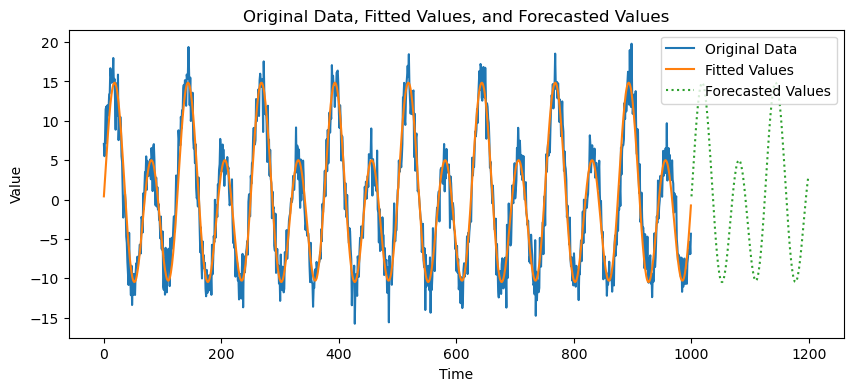

In [35]:
# Extend the time series for forecasting
t_forecast = np.arange(1000, 1200)

# Create the design matrix for the extended time series
X_forecast = create_design_matrix(t_forecast, significant_freqs)

# Generate the forecasted values
forecasted_values = model_combined.predict(X_forecast)

# Plot the original data, fitted signal, and forecasted values
plt.figure(figsize=(10, 4))
plt.plot(t, simulated_data, label='Original Data')
plt.plot(t, fitted_signal, label='Fitted Values')
plt.plot(t_forecast, forecasted_values, label='Forecasted Values', linestyle='dotted')
plt.title('Original Data, Fitted Values, and Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
